In [1]:
from models.models import get_feature_extractor
from data.make_dataset import load_mitbih, load_ptbdb, downsample
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

Using TensorFlow backend.


In [2]:
train, test, y_train, y_test = load_mitbih()
train, y_train = downsample(train, y_train, 100)

In [3]:
train.shape, y_train.shape

((500, 187, 1), (500,))

In [4]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int8), array([100, 100, 100, 100, 100]))

In [5]:
feature_extractor = get_feature_extractor('./results/cnn-lstm-mitbih/cnn-lstm-mitbih.h5','./results/cnn-lstm-mitbih/cnn-lstm-mitbih-weights.h5')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1_input (InputLayer)  (None, 187, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 187, 32)           192       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 187, 32)           5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 92, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 92, 64)            10304     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 92, 64)            20544     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 44, 64)            0   

/home/martin/.local/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
embedded = feature_extractor.predict(train,verbose=True)

500/500 [==============================] - 1s 2ms/step


In [7]:
embedded.shape

(500, 5632)

In [8]:
X = PCA(n_components=50,random_state=42).fit_transform(embedded)

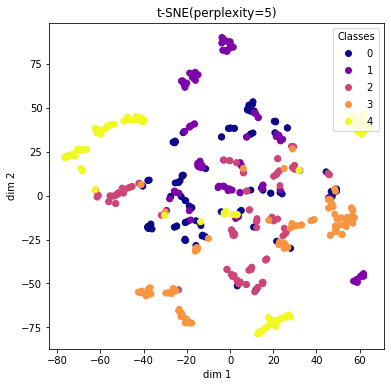

In [9]:
X_embedded = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(X)
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('t-SNE(perplexity=5)')
plt.savefig('./visualization/mitbih-tsne-5.png',dpi=150)

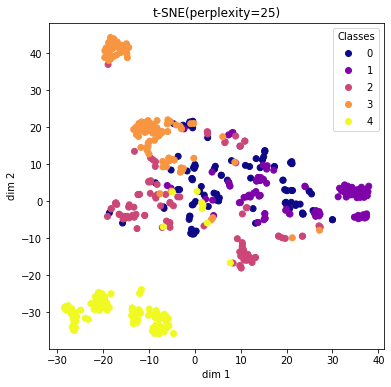

In [10]:
X_embedded = TSNE(n_components=2, perplexity=25,random_state=42).fit_transform(X)
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('t-SNE(perplexity=25)')
plt.savefig('./visualization/mitbih-tsne-25.png',dpi=150)

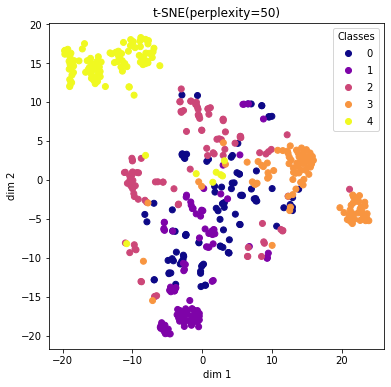

In [11]:
X_embedded = TSNE(n_components=2, perplexity=50, random_state=42).fit_transform(X)
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('t-SNE(perplexity=50)')
plt.savefig('./visualization/mitbih-tsne-50.png',dpi=150)

In [12]:
reducer = umap.UMAP(min_dist=0.99,n_neighbors=15,random_state=42)

In [13]:
embedding = reducer.fit_transform(X)
embedding.shape

(500, 2)

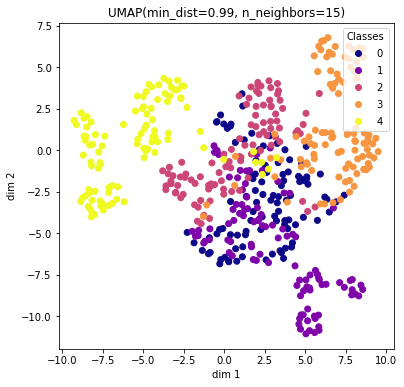

In [14]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(embedding[:,0],embedding[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('UMAP(min_dist=0.99, n_neighbors=15)')
plt.savefig('./visualization/mitbih-umap.png',dpi=150)

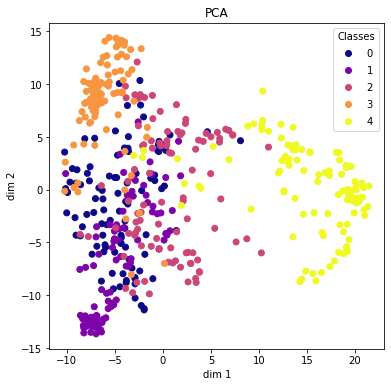

In [15]:
X_pca = PCA(n_components=2,random_state=42).fit_transform(embedded)
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_pca[:,0],X_pca[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('PCA')
plt.savefig('./visualization/mitbih-pca.png',dpi=150)

In [16]:
train, test, y_train, y_test = load_ptbdb()
train, y_train = downsample(train, y_train, 250)
train.shape, y_train.shape
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int8), array([250, 250]))

In [17]:
embedded = feature_extractor.predict(train,verbose=True)
embedded.shape

500/500 [==============================] - 1s 2ms/step


(500, 5632)

In [18]:
X = PCA(n_components=50).fit_transform(embedded)

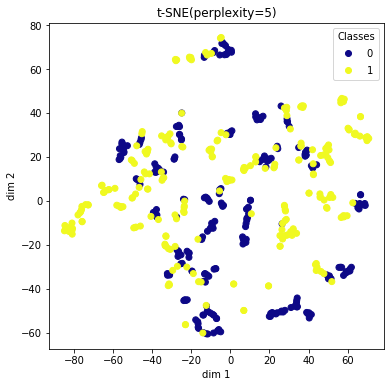

In [19]:
X_embedded = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(X)
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('t-SNE(perplexity=5)')
plt.savefig('./visualization/ptbdb-tsne-5.png',dpi=150)

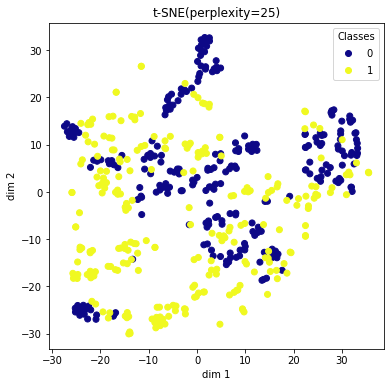

In [20]:
X_embedded = TSNE(n_components=2, perplexity=25, random_state=42).fit_transform(X)
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('t-SNE(perplexity=25)')
plt.savefig('./visualization/ptbdb-tsne-25.png',dpi=150)

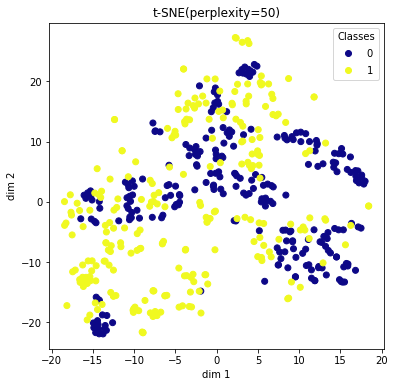

In [21]:
X_embedded = TSNE(n_components=2, perplexity=50, random_state=42).fit_transform(X)
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('t-SNE(perplexity=50)')
plt.savefig('./visualization/ptbdb-tsne-50.png',dpi=150)

In [22]:
reducer = umap.UMAP(min_dist=0.99,n_neighbors=15,random_state=42)

In [23]:
embedding = reducer.fit_transform(X)
embedding.shape

(500, 2)

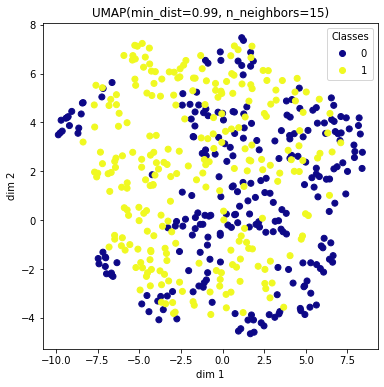

In [24]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(embedding[:,0],embedding[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('UMAP(min_dist=0.99, n_neighbors=15)')
plt.savefig('./visualization/ptbdb-umap.png',dpi=150)

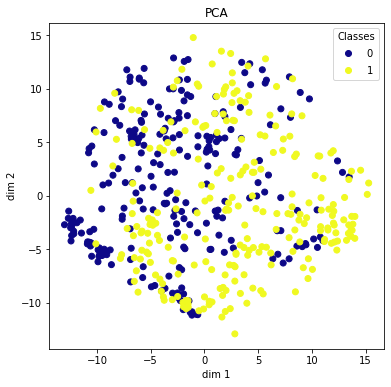

In [25]:
X_pca = PCA(n_components=2,random_state=42).fit_transform(embedded)
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_pca[:,0],X_pca[:,1], c = y_train,cmap=plt.cm.plasma)
legend1 = plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.title('PCA')
plt.savefig('./visualization/ptbdb-pca.png',dpi=150)